In [1]:
df=pd.read_csv(r"C:\Users\91987\Desktop\Data Train\Projects\Covid/aggregate_covid_country.csv")

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [4]:
df.shape

(23688, 5)

In [5]:
# Checkinh Number of countries in column Country

l=df["Country"].unique()
print(len(l))

188


<IPython.core.display.Javascript object>

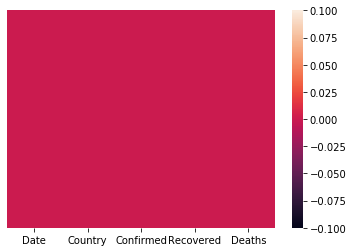

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

<IPython.core.display.Javascript object>

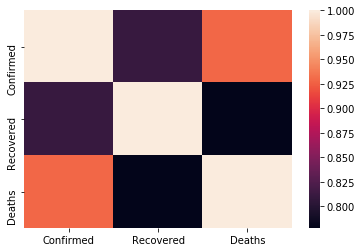

In [7]:
sns.heatmap(df.corr())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


__Extacting Month and date from column Date__

In [9]:
df["month"]=pd.to_datetime(df.Date).dt.month
df["date"]=pd.to_datetime(df.Date).dt.day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
df["month"]

0        1
1        1
2        1
3        1
4        1
        ..
23683    5
23684    5
23685    5
23686    5
23687    5
Name: month, Length: 23688, dtype: int64

In [11]:
df["date"]

0        22
1        22
2        22
3        22
4        22
         ..
23683    26
23684    26
23685    26
23686    26
23687    26
Name: date, Length: 23688, dtype: int64

In [12]:
# Removing Date column
# We have not extracted year because this data is all 2020's dataset

df.drop(["Date"],axis=1,inplace=True)

In [13]:
df.shape

(23688, 6)

In [14]:
df.columns

Index(['Country', 'Confirmed', 'Recovered', 'Deaths', 'month', 'date'], dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

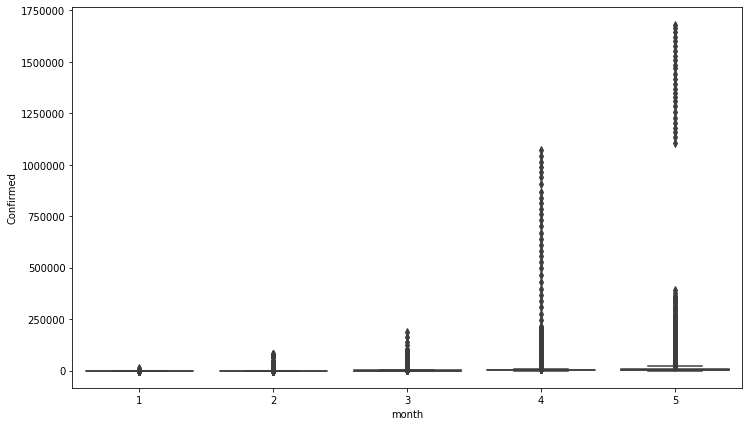

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="Confirmed", data = df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

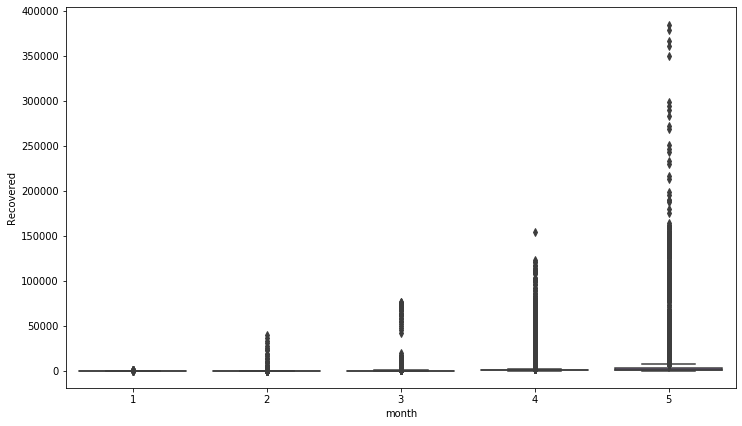

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="Recovered", data = df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

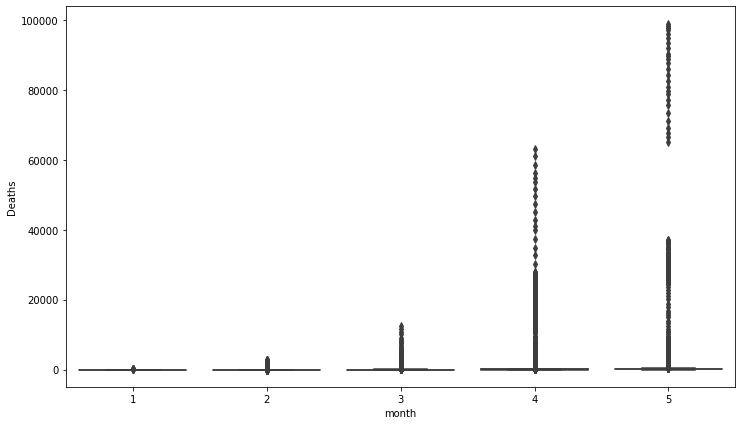

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="Deaths", data = df)

In [18]:
df.head()

,Country,Confirmed,Recovered,Deaths,month,date
0,Afghanistan,0,0,0,1,22
1,Albania,0,0,0,1,22
2,Algeria,0,0,0,1,22
3,Andorra,0,0,0,1,22
4,Angola,0,0,0,1,22


__Handling Categorical Data (Country)__

In [19]:
country_n=pd.get_dummies(df["Country"],drop_first=True)

<IPython.core.display.Javascript object>

In [20]:
country_n

,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__Adding encoded data columns to data set and removing original country column__

In [21]:
df_n=pd.concat([df,country_n],axis=1)

<IPython.core.display.Javascript object>

In [22]:
df_n

,Country,Confirmed,Recovered,Deaths,month,date,Albania,Algeria,Andorra,Angola,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,Afghanistan,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,1,22,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,1,22,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,1,22,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,1,22,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,5,26,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23684,Western Sahara,9,6,1,5,26,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23685,Yemen,249,10,49,5,26,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23686,Zambia,920,336,7,5,26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df_n.drop(["Country"],axis=1,inplace=True)

In [24]:
df_n.shape

(23688, 192)

### Appying Algorithms

In [25]:
x=df_n.drop(["Deaths"],axis=1)
x.head()

,Confirmed,Recovered,month,date,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,1,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,22,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,22,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,22,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y=df_n["Deaths"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Deaths, dtype: int64

In [27]:
y.shape

(23688,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [49]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("Optimal Random state is :",i)
        print("Traing Accuracy sore is - ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy sore is - ",accuracy_score(y_test,pred_test)*100)
    

# I can't find Random State using this technique, please check if it is wrongly implemented or something else

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=0.30)

In [35]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#lrped=lr.predict(x_test)
lrped = lr.predict(x_test)
r2_score=r2_score(lrped,y_test)
print(r2_score)

0.9220535062678297


In [37]:
lr.score(x_test,y_test)

0.9262548493874404

### Decission Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9985384857351408

In [ ]:
parameters= {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)                                                                               

In [ ]:
dt=DecisionTreeRegressor(criterion=,splitter)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

__Importing Model__

In [40]:
import pickle
model="Covid"
pickle.dump(lr,open(model,'wb'))